<a href="https://colab.research.google.com/github/eviidoe/Bike-Share-Data-Analysis/blob/main/Time_Series_Rental_Bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Rental Bikeshare

# Import Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


from google.colab import files
uploaded = files.upload()


Saving trips.csv to trips.csv


MessageError: ignored

In [ ]:
trips = pd.read_csv("../content/202102-cbs-tripdata.csv", index_col=0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Timeseries analysis_Regression

In [ ]:
trips

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
ride_id,,,,,,,,,,,,
0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual
DFD528B4F2B3CA6A,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2398431BB0EB78BE,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
6E32C58697957443,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2DCACE8B26B0A50A,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
...,...,...,...,...,...,...,...,...,...,...,...,...
009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member
7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member
D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual


Numerical Attributes: Age, FnlWgt, Education-num, Capital-Gain, Capital-Loss, Hours-Per-Week.
Categorical Attributes: rideable_type, started_at, ended_at, Start_station_name, start_station_id, end_station_name, end_statoon_id, member_casual

In [ ]:
trips.index = trips['started_at']


In [ ]:
trips.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
started_at,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member


In [ ]:
trips.loc['2021-04-02'].groupby('start_station_name').count()['rideable_type'].sort_values(ascending = False)


KeyError: ignored

# Subset1

In [ ]:
trips.loc[:,'values'] = 1

In [ ]:
trips

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date,values
ride_id,,,,,,,,,,,,,,,
0F961E4450F8544E,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667,2021-02-20,1
DFD528B4F2B3CA6A,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000,2021-02-15,1
2398431BB0EB78BE,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667,2021-02-15,1
6E32C58697957443,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333,2021-02-24,1
2DCACE8B26B0A50A,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000,2021-02-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
009F4F7752A11024,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,23.483333,2021-02-11,1
7A87D690A552427D,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,26.066667,2021-02-09,1
D157EF3275190210,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,25.650000,2021-02-09,1


In [ ]:
trips = trips[['values']]
trips.sort_index(inplace= True)
trips

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,values
ride_id,
00006188E6AACAAA,1
00008E0BCBA8637C,1
0000CC3F2AF022BD,1
0000CFF2F1CF2942,1
0000ECCB24C9E874,1
...,...
FFFDC00FA11F1B2B,1
FFFE61260A35BDE1,1
FFFF0418C05786AE,1


In [ ]:
trips.resample('1D').sum().plot()

TypeError: ignored

In [ ]:
trips.loc['2021-02-01':'2021-02-28'].resample('15T').sum().plot();

# Subset2


In [ ]:
trips

,values
ride_id,
00006188E6AACAAA,1
00008E0BCBA8637C,1
0000CC3F2AF022BD,1
0000CFF2F1CF2942,1
0000ECCB24C9E874,1
...,...
FFFDC00FA11F1B2B,1
FFFE61260A35BDE1,1
FFFF0418C05786AE,1


In [ ]:
trips = trips.astype({"started_at": "datetime64"})
trips = trips.astype({"ended_at": "datetime64"})

KeyError: ignored

In [ ]:
trips.loc[:,'day'] = trips['started_at'].dt.day
trips.loc[:,'hour'] = trips['started_at'].dt.hour

In [ ]:
sns.lineplot(data = trips.groupby(by = ['hour']).count()['rideable_type'].reset_index(), 
             x = 'hour', y = 'rideable_type');

# Subset3

In [ ]:
trips

,values
ride_id,
00006188E6AACAAA,1
00008E0BCBA8637C,1
0000CC3F2AF022BD,1
0000CFF2F1CF2942,1
0000ECCB24C9E874,1
...,...
FFFDC00FA11F1B2B,1
FFFE61260A35BDE1,1
FFFF0418C05786AE,1


In [ ]:
trips = trips.astype({"started_at": "datetime64"})
trips = trips.astype({"ended_at": "datetime64"})

KeyError: ignored

In [ ]:
trips.loc[:,'day'] = trips['started_at'].dt.day
trips.loc[:,'hour'] = trips['started_at'].dt.hour

In [ ]:
member_lst = ["member"]
trips['start_member'] = ['member' if x in member_lst else 'non-member' for x in trips['member_casual']]

In [ ]:
trips.head()


In [ ]:
trips_member = trips[~trips.start_member.str.contains("non-member")]
#trips_non-member = trips[~trips.start_member.str.contains("member")]


In [ ]:
trips_member

In [ ]:
sns.lineplot(data = trips_member.groupby(by = ['hour']).count().reset_index(), 
             x = 'hour', y = 'trips_member');

# Preperation


In [ ]:
trips

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
started_at,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 12:25:21,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member
2021-02-09 12:39:15,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member
2021-02-09 12:39:24,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual


In [ ]:
trips.columns


Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual'],
      dtype='object')

In [ ]:
trips.dtypes


rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [ ]:
trips = trips.astype({"started_at": "datetime64"})
trips = trips.astype({"ended_at": "datetime64"})

In [ ]:
trips.dtypes


rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [ ]:
#import datetime as dt

#trips['started_at'] = trips['started_at'].apply(lambda x : pd.to_datetime(str(x)))

#trips['start_time'] = trips['started_at'].dt.time

In [ ]:
#trips['ended_at'] = trips['ended_at'].apply(lambda x : pd.to_datetime(str(x)))

#trips['end_time'] = trips['ended_at'].dt.time

In [ ]:
trips['duration']=(trips['ended_at']-trips['started_at'])/np.timedelta64(1,'m')


In [ ]:
trips.head()


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
started_at,,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000


In [ ]:
import datetime as dt
trips['start_date'] = trips['started_at'].dt.date


In [ ]:
trips.head()


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date
started_at,,,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667,2021-02-20
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000,2021-02-15
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667,2021-02-15
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333,2021-02-24
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000,2021-02-05


In [ ]:
trips = trips.astype({"start_date": "datetime64"})


In [ ]:
trips

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date
started_at,,,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667,2021-02-20
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000,2021-02-15
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667,2021-02-15
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333,2021-02-24
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000,2021-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 12:25:21,classic_bike,2021-02-11 12:25:21,2021-02-11 12:48:50,1st & K St NE,31662,20th & E St NW,31204,38.902386,-77.005649,38.896300,-77.045000,member,23.483333,2021-02-11
2021-02-09 12:39:15,electric_bike,2021-02-09 12:39:15,2021-02-09 13:05:19,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901953,-76.978679,38.896287,-77.044961,member,26.066667,2021-02-09
2021-02-09 12:39:24,electric_bike,2021-02-09 12:39:24,2021-02-09 13:05:03,Maryland Ave & 17th St NE,31656,20th & E St NW,31204,38.901973,-76.978606,38.896269,-77.044956,casual,25.650000,2021-02-09


In [ ]:
#from google.colab import drive
#drive.mount('drive')

In [ ]:
#trips.to_csv('trips1.csv')
#!cp trips1.csv "drive/My Drive/"

In [ ]:
#plt.hist(trips.start_weekday);
#plt.title('Bike Rentals by Workingday')
#plt.xlabel('start_weekday')
#plt.ylabel('Cnt');

In [ ]:
trips["start_day"] = trips["started_at"].dt.day_name()


In [ ]:
trips["start_hour"] = trips["started_at"].dt.hour


In [ ]:
trips_day_count = trips.groupby(["start_hour","start_day"]).count()


In [ ]:
trips_day_count.head()


rideable_type  started_at  ...  duration  start_date
start_hour start_day                             ...                      
0          Friday                69          69  ...        69          69
           Monday                65          65  ...        65          65
           Saturday             149         149  ...       149         149
           Sunday               185         185  ...       185         185
           Thursday              58          58  ...        58          58

[5 rows x 14 columns]

In [ ]:
trips_day_count = trips_day_count['duration'].unstack()


In [ ]:
trips_day_count = trips_day_count/108


In [ ]:
trips_day_count

start_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
start_hour,,,,,,,
0,0.638889,0.601852,1.379630,1.712963,0.537037,0.268519,0.361111
1,0.481481,0.259259,0.768519,0.768519,0.157407,0.064815,0.194444
2,0.111111,0.185185,0.620370,0.425926,0.157407,0.074074,0.129630
3,0.092593,0.148148,0.287037,0.222222,0.111111,0.074074,0.166667
4,0.277778,0.388889,0.314815,0.194444,0.250000,0.222222,0.342593
5,0.490741,0.425926,0.277778,0.231481,0.611111,0.703704,0.648148
6,2.240741,1.555556,1.046296,0.583333,2.111111,2.092593,1.879630
7,4.388889,3.342593,1.916667,0.861111,3.953704,3.990741,4.194444
8,6.166667,4.277778,3.203704,1.703704,5.342593,5.888889,5.231481


Text(0, 0.5, 'Trips number')

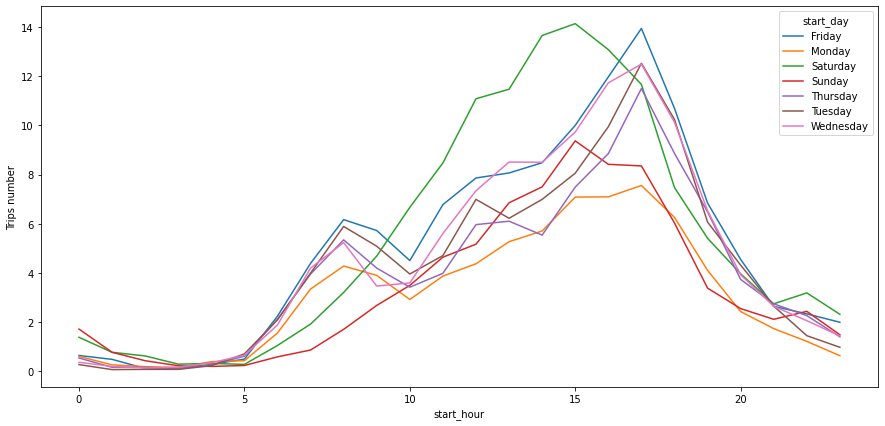

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
trips_day_count.plot(ax=ax)
plt.ylabel('Trips number')

In [ ]:
weekday_lst = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
trips['start_weekday'] = ['weekday' if x in weekday_lst else 'weekend' for x in trips['start_day']]

In [ ]:
trips.head()


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date,start_day,start_hour,start_weekday
started_at,,,,,,,,,,,,,,,,,
2021-02-20 14:03:25,classic_bike,2021-02-20 14:03:25,2021-02-20 14:14:17,21st St & Pennsylvania Ave NW,31252,New York Ave & 15th St NW,31222,38.901539,-77.046564,38.899032,-77.033354,casual,10.866667,2021-02-20,Saturday,14,weekend
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,86.650000,2021-02-15,Monday,9,weekday
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.366667,2021-02-15,Monday,9,weekday
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,38.733333,2021-02-24,Wednesday,14,weekday
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,38.878433,-77.030230,member,0.050000,2021-02-05,Friday,16,weekday


In [ ]:
trips_weekday = trips[~trips.start_weekday.str.contains("weekend")]


In [ ]:
trips_weekday.head()


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_date,start_day,start_hour,start_weekday
started_at,,,,,,,,,,,,,,,,,
2021-02-15 09:54:23,classic_bike,2021-02-15 09:54:23,2021-02-15 11:21:02,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.03023,38.878433,-77.03023,member,86.650000,2021-02-15,Monday,9,weekday
2021-02-15 09:53:12,classic_bike,2021-02-15 09:53:12,2021-02-15 09:53:34,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.03023,38.878433,-77.03023,member,0.366667,2021-02-15,Monday,9,weekday
2021-02-24 14:50:17,classic_bike,2021-02-24 14:50:17,2021-02-24 15:29:01,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.03023,38.878433,-77.03023,member,38.733333,2021-02-24,Wednesday,14,weekday
2021-02-05 16:39:10,classic_bike,2021-02-05 16:39:10,2021-02-05 16:39:13,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.03023,38.878433,-77.03023,member,0.050000,2021-02-05,Friday,16,weekday
2021-02-09 16:20:45,classic_bike,2021-02-09 16:20:45,2021-02-09 16:38:33,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.03023,38.878433,-77.03023,member,17.800000,2021-02-09,Tuesday,16,weekday


In [ ]:
from google.colab import drive
#drive.mount('drive')

In [ ]:
#trips.to_csv('trips1.csv')
#!cp trips1.csv "drive/My Drive/"

In [ ]:
trips_station = trips_weekday.groupby(["start_hour","start_station_id"]).count()


In [ ]:
trips_station

rideable_type  ...  start_weekday
start_hour start_station_id                 ...               
0          31040.0                       1  ...              1
           31055.0                       1  ...              1
           31101.0                       1  ...              1
           31104.0                       2  ...              2
           31108.0                       1  ...              1
...                                    ...  ...            ...
23         32065                         1  ...              1
           32091                         2  ...              2
           32401                         1  ...              1
           32418                         1  ...              1
           32420                         2  ...              2

[7959 rows x 15 columns]

In [ ]:
trips_station = trips_station['duration'].unstack()


In [ ]:
trips_station


start_station_id,31000.0,31001.0,31002.0,31003.0,31004.0,31005.0,31006.0,31010.0,31011.0,31012.0,31014.0,31015.0,31016.0,31018.0,31021.0,31022.0,31023.0,31027.0,31029.0,31033.0,31035.0,31036.0,31037.0,31039.0,31040.0,31041.0,31042.0,31045.0,31047.0,31048.0,31052.0,31053.0,31054.0,31055.0,31059.0,31061.0,31062.0,31064.0,31066.0,31068.0,...,32214,32215,32216,32217,32219,32222,32224,32227,32230,32231,32232,32236,32401,32402,32403,32405,32406,32408,32410,32411,32412,32414,32415,32416,32417,32418,32419,32420,32422,32423,32600,32601,32602,32603,32604,32605,32606,32607,32609,MTL-ECO5-03
start_hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trips_station.isna().sum()


start_station_id
31000.0        20
31001.0        22
31002.0        22
31003.0        21
31004.0        23
               ..
32605          17
32606          19
32607          11
32609          17
MTL-ECO5-03    22
Length: 876, dtype: int64

In [ ]:
trips_station = trips_station.dropna(thresh=len(trips_station) - 2, axis=1)


In [ ]:
trips_station

start_station_id,31117,31201,31203,31212,31236,31266,31296,31619,31649
start_hour,,,,,,,,,
0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0
1,NaN,1.0,1.0,3.0,NaN,1.0,NaN,NaN,NaN
2,1.0,1.0,NaN,1.0,1.0,2.0,1.0,NaN,1.0
3,NaN,1.0,NaN,NaN,1.0,3.0,NaN,1.0,NaN
4,1.0,NaN,14.0,2.0,1.0,15.0,4.0,1.0,2.0
5,15.0,3.0,7.0,2.0,NaN,3.0,2.0,2.0,2.0
6,24.0,23.0,6.0,4.0,2.0,22.0,6.0,5.0,10.0
7,32.0,13.0,31.0,2.0,4.0,28.0,16.0,4.0,24.0
8,29.0,31.0,15.0,12.0,11.0,22.0,21.0,11.0,39.0


In [ ]:
trips_station = trips_station.fillna(0)


In [ ]:
trips_station

start_station_id,31117,31201,31203,31212,31236,31266,31296,31619,31649
start_hour,,,,,,,,,
0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0
4,1.0,0.0,14.0,2.0,1.0,15.0,4.0,1.0,2.0
5,15.0,3.0,7.0,2.0,0.0,3.0,2.0,2.0,2.0
6,24.0,23.0,6.0,4.0,2.0,22.0,6.0,5.0,10.0
7,32.0,13.0,31.0,2.0,4.0,28.0,16.0,4.0,24.0
8,29.0,31.0,15.0,12.0,11.0,22.0,21.0,11.0,39.0


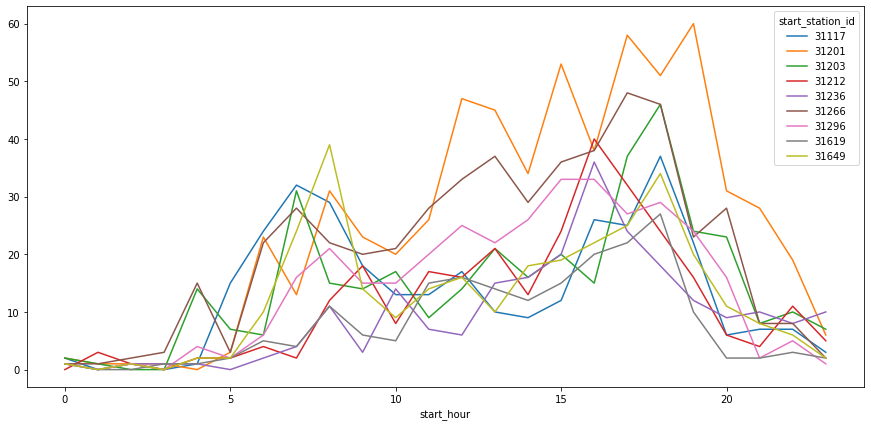

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
trips_station.plot(ax=ax)

In [ ]:
trips_station_comparison = trips_station.loc[:,'31201':'31236']
#data.loc[:,'2008q3':'2009q2']

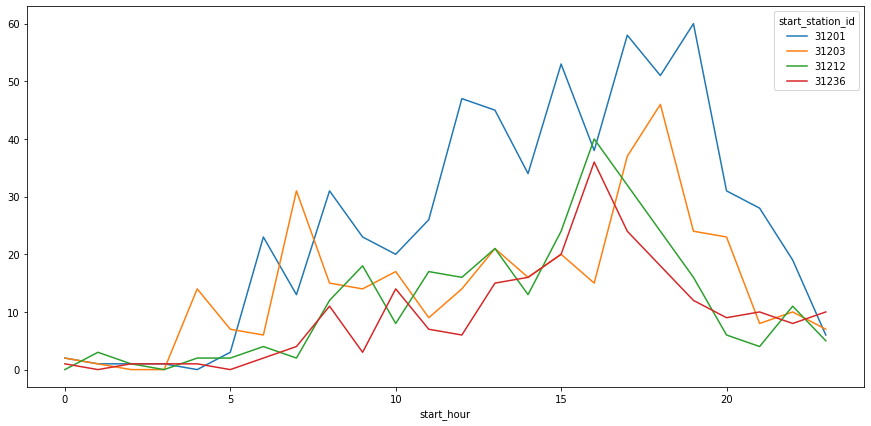

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
trips_station_comparison.plot(ax=ax)

In [ ]:
# Normalize the time series for all stations using the apply method.
trips_station_normal = trips_station.apply(lambda x: (x-min(x))/(max(x)-min(x)), axis=0)


In [ ]:
trips_station_normal


start_station_id,31117,31201,31203,31212,31236,31266,31296,31619,31649
start_hour,,,,,,,,,
0,0.054054,0.033333,0.043478,0.000,0.027778,0.000000,0.030303,0.037037,0.025641
1,0.000000,0.016667,0.021739,0.075,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.027027,0.016667,0.000000,0.025,0.027778,0.021277,0.030303,0.000000,0.025641
3,0.000000,0.016667,0.000000,0.000,0.027778,0.042553,0.000000,0.037037,0.000000
4,0.027027,0.000000,0.304348,0.050,0.027778,0.297872,0.121212,0.037037,0.051282
5,0.405405,0.050000,0.152174,0.050,0.000000,0.042553,0.060606,0.074074,0.051282
6,0.648649,0.383333,0.130435,0.100,0.055556,0.446809,0.181818,0.185185,0.256410
7,0.864865,0.216667,0.673913,0.050,0.111111,0.574468,0.484848,0.148148,0.615385
8,0.783784,0.516667,0.326087,0.300,0.305556,0.446809,0.636364,0.407407,1.000000


In [ ]:
# Transpose the dataframe in order to be able to apply the k-means model on each bike station.
trips_station_normal_trans = trips_station_normal.transpose()

In [ ]:
# Transform the trips_station_normal_trans dataframe to an array in order to be able to use k-means method
X = trips_station_normal_trans.to_numpy()

In [ ]:
# Fit the kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
# See the label array and assign it to a variable called label
kmeans.labels_

array([1, 2, 1, 0, 0, 2, 2, 0, 1], dtype=int32)

In [ ]:
# Add the label array to the trips_station_normal_trans array
array_cluster = np.column_stack((trips_station_normal_trans,kmeans.labels_))

In [ ]:
# Transform the array into a dataframe
trips_station_normal_trans = pd.DataFrame(array_cluster)

In [ ]:
# Transpose the dataframe to have the cluster number for each station in the dataframe
trips_station_normal_cluster = trips_station_normal_trans.transpose()

In [ ]:
trips_station_normal_cluster


,0,1,2,3,4,5,6,7,8
0,0.054054,0.033333,0.043478,0.000,0.027778,0.000000,0.030303,0.037037,0.025641
1,0.000000,0.016667,0.021739,0.075,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.027027,0.016667,0.000000,0.025,0.027778,0.021277,0.030303,0.000000,0.025641
3,0.000000,0.016667,0.000000,0.000,0.027778,0.042553,0.000000,0.037037,0.000000
4,0.027027,0.000000,0.304348,0.050,0.027778,0.297872,0.121212,0.037037,0.051282
5,0.405405,0.050000,0.152174,0.050,0.000000,0.042553,0.060606,0.074074,0.051282
6,0.648649,0.383333,0.130435,0.100,0.055556,0.446809,0.181818,0.185185,0.256410
7,0.864865,0.216667,0.673913,0.050,0.111111,0.574468,0.484848,0.148148,0.615385
8,0.783784,0.516667,0.326087,0.300,0.305556,0.446809,0.636364,0.407407,1.000000
9,0.486486,0.383333,0.304348,0.450,0.083333,0.404255,0.454545,0.222222,0.358974


In [ ]:
#Select the stations that are part of cluster 0 (i.e. that have index 24 = 0)
trips_station_normal_cluster0 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==0.000000]]

In [ ]:
# Check if it worked
trips_station_normal_cluster0

,3,4,7
0,0.000,0.027778,0.037037
1,0.075,0.000000,0.000000
2,0.025,0.027778,0.000000
3,0.000,0.027778,0.037037
4,0.050,0.027778,0.037037
5,0.050,0.000000,0.074074
6,0.100,0.055556,0.185185
7,0.050,0.111111,0.148148
8,0.300,0.305556,0.407407
9,0.450,0.083333,0.222222


In [ ]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster0 = trips_station_normal_cluster0.drop([24])

In [ ]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster0['average'] = trips_station_normal_cluster0.mean(numeric_only=True, axis=1)


In [ ]:
trips_station_normal_cluster0.head()


,3,4,7,average
0,0.000,0.027778,0.037037,0.021605
1,0.075,0.000000,0.000000,0.025000
2,0.025,0.027778,0.000000,0.017593
3,0.000,0.027778,0.037037,0.021605
4,0.050,0.027778,0.037037,0.038272


Text(0.5, 0, 'Hour')

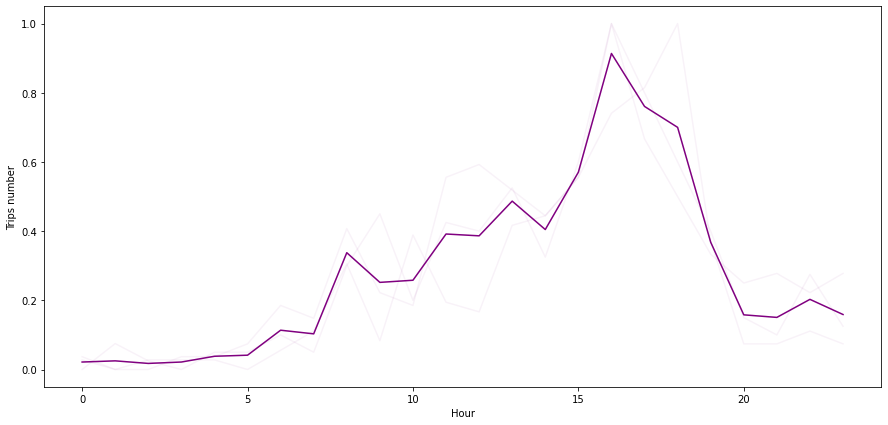

In [ ]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster0.plot(ax=ax,color='purple', alpha=0.05)
trips_station_normal_cluster0["average"].plot(ax=ax,color='purple', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [ ]:
# Select the stations that are part of cluster 1 (i.e. that have index 24 = 1)
trips_station_normal_cluster1 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==1.000000]]

In [ ]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster1 = trips_station_normal_cluster1.drop([24])


In [ ]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster1['average'] = trips_station_normal_cluster1.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

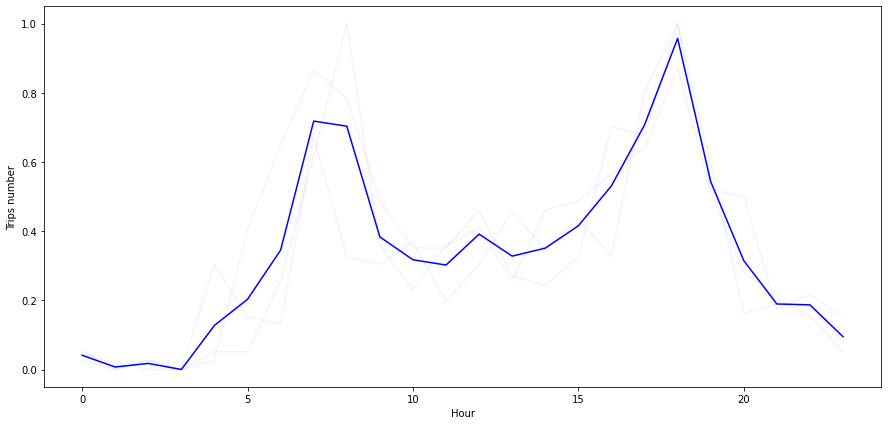

In [ ]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster1.plot(ax=ax,color='blue', alpha=0.05)
trips_station_normal_cluster1["average"].plot(ax=ax,color='blue', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [ ]:
# Select the stations that are part of cluster 2 (i.e. that have index 24 = 2)
trips_station_normal_cluster2 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==2.000000]]

In [ ]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster2 = trips_station_normal_cluster2.drop([24])

In [ ]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster2['average'] = trips_station_normal_cluster2.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

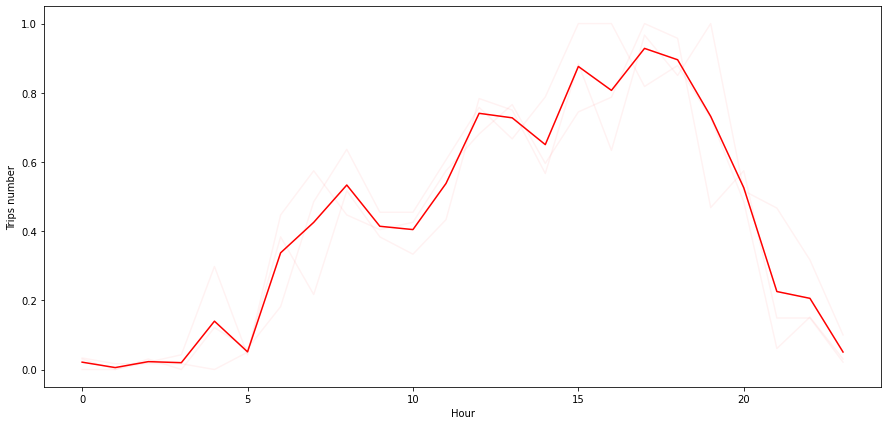

In [ ]:
#Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster2.plot(ax=ax,color='red', alpha=0.05)
trips_station_normal_cluster2["average"].plot(ax=ax,color='red', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')